In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import visualisation
data_1=pd.read_csv('../data/derivatives/dataframe.csv')

ModuleNotFoundError: No module named 'visualisation'

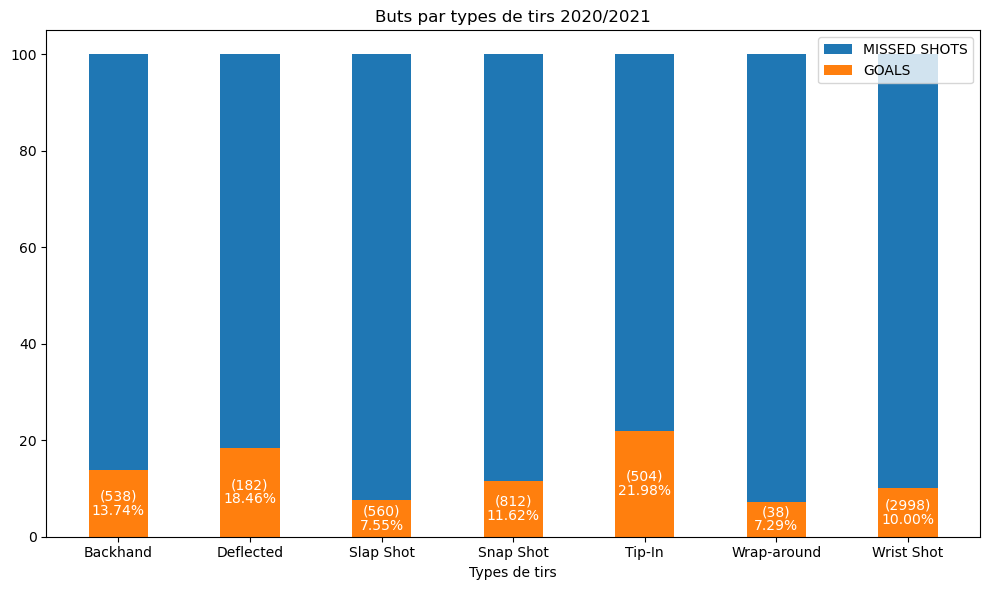

In [9]:
shots_goals (data_1, 2020)

C:\Users\mouaa\AppData\Local\Temp\ipykernel_20692\2519322750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = np.sqrt((90-np.absolute(df['coord_x'])).pow(2) + df['coord_y'].pow(2))


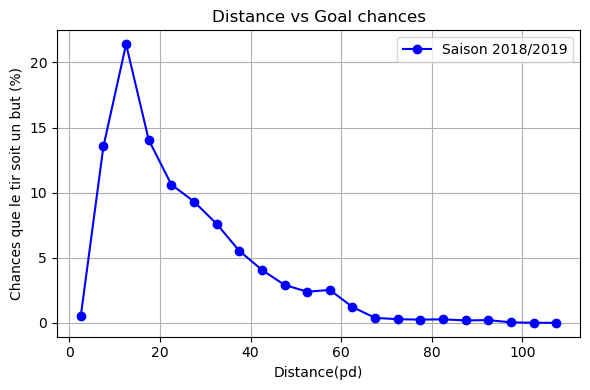

C:\Users\mouaa\AppData\Local\Temp\ipykernel_20692\2519322750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = np.sqrt((90-np.absolute(df['coord_x'])).pow(2) + df['coord_y'].pow(2))


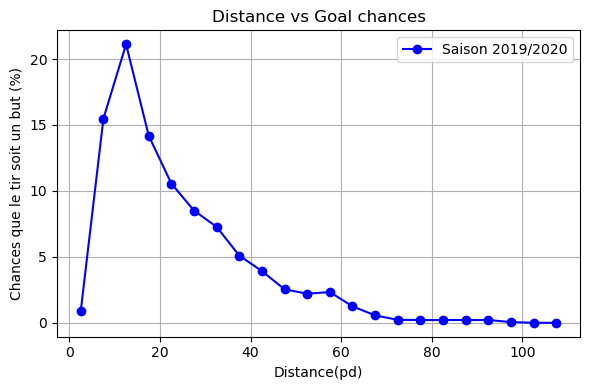

C:\Users\mouaa\AppData\Local\Temp\ipykernel_20692\2519322750.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = np.sqrt((90-np.absolute(df['coord_x'])).pow(2) + df['coord_y'].pow(2))


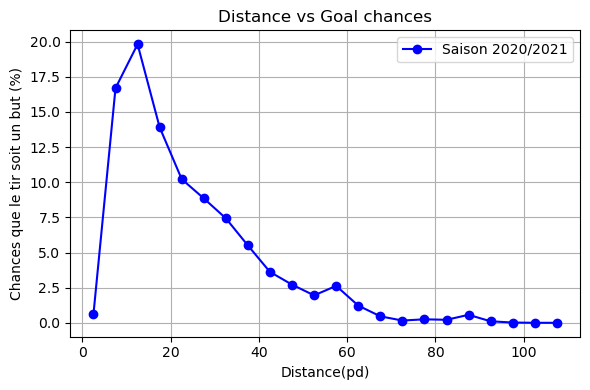

In [92]:
Distance_goals(data_1, 2018)
Distance_goals(data_1, 2019)
Distance_goals(data_1, 2020)

C:\Users\mouaa\AppData\Local\Temp\ipykernel_20692\599667839.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance'] = np.sqrt((90-np.absolute(df['coord_x'])).pow(2) + df['coord_y'].pow(2))


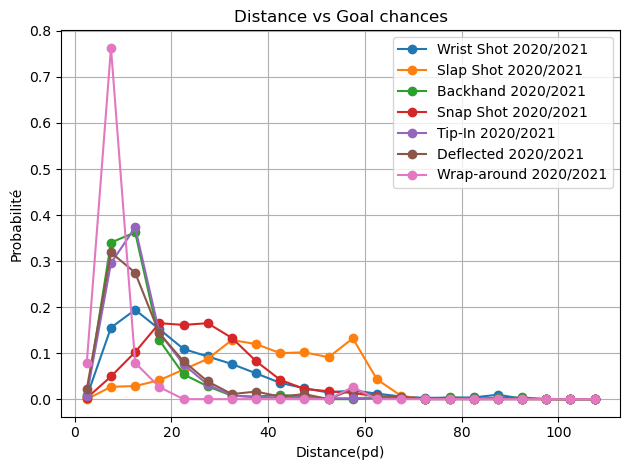

In [100]:
Distance_goals_shots(data_1, 2020)

# dt contient tout les coordonnées ramenées à la zone offensive

In [ ]:
dt=pd.DataFrame()
for gameid in data_1['gameId'].unique():
    df= pd.DataFrame()
    dire = data_1[data_1['gameId']== gameid].reset_index().loc[0,'homeRinkSide']
    for i in range (1,5):
        df1=data_1[(data_1['gameId']== gameid) & (data_1['prd']== i)]
        if dire == 'left':
            if i % 2 != 0:
                
                df1['new_x']= df1.apply(lambda row: row['coord_x'] if row['hostTeam']==row['team'] else (-1)*row['coord_x'], axis=1)
                df1['new_y']= df1.apply(lambda row: row['coord_y'] if row['hostTeam']==row['team'] else (-1)*row['coord_y'], axis=1)
            else:
                df1['new_x']= df1.apply(lambda row: row['coord_x'] if row['hostTeam']!=row['team'] else (-1)*row['coord_x'], axis=1) 
                df1['new_y']= df1.apply(lambda row: row['coord_y'] if row['hostTeam']!=row['team'] else (-1)*row['coord_y'], axis=1)        
        else:
            if i % 2 != 0:
                
                df1['new_x']= df1.apply(lambda row: row['coord_x'] if row['hostTeam']!=row['team'] else (-1)*row['coord_x'], axis=1)
                df1['new_y']= df1.apply(lambda row: row['coord_y'] if row['hostTeam']!=row['team'] else (-1)*row['coord_y'], axis=1)
            else:
                df1['new_x']= df1.apply(lambda row: row['coord_x'] if row['hostTeam']==row['team'] else (-1)*row['coord_x'], axis=1)
                df1['new_y']= df1.apply(lambda row: row['coord_y'] if row['hostTeam']==row['team'] else (-1)*row['coord_y'], axis=1)
        df=pd.concat([df,df1], axis=0, ignore_index=True)
    dt=pd.concat([dt, df], axis=0, ignore_index=True)

# les lignes contenant les valeurs aberrantes :

In [90]:
dt_f =dt[dt['new_x']>=0]
dt[dt['new_x']<0]

,gameId,evt_idx,prd,prdTime,team,goalFlag,shotCategory,coord_x,coord_y,shotBy,goalieName,noGoalie,teamStrength,visitorTeam,hostTeam,homeRinkSide,awayRinkSide,new,new_x,new_y
187,2016020003,323,3,18:38,Edmonton Oilers,True,Wrist Shot,-32.0,-28.0,Jordan Eberle,EmptyNet,True,EVEN,Calgary Flames,Edmonton Oilers,left,right,NaN,-32.0,-28.0
361,2016020006,346,3,17:37,New York Rangers,True,Wrist Shot,26.0,-26.0,J.T. Miller,EmptyNet,True,EVEN,New York Islanders,New York Rangers,right,left,NaN,-26.0,26.0
570,2016020009,346,3,17:55,Detroit Red Wings,True,Slap Shot,1.0,-20.0,Danny DeKeyser,Ben Bishop,False,EVEN,Detroit Red Wings,Tampa Bay Lightning,left,right,NaN,-1.0,20.0
698,2016020012,98,2,00:11,Carolina Hurricanes,False,Wrist Shot,72.0,-21.0,Jaccob Slavin,Connor Hellebuyck,False,NaN,Carolina Hurricanes,Winnipeg Jets,right,left,NaN,-72.0,21.0
998,2016020017,246,3,06:50,Boston Bruins,False,Wrist Shot,-2.0,29.0,Torey Krug,Frederik Andersen,False,NaN,Boston Bruins,Toronto Maple Leafs,right,left,NaN,-2.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381959,2020030412,215,2,18:05,Tampa Bay Lightning,False,Wrist Shot,63.0,-13.0,Victor Hedman,Carey Price,False,NaN,Montréal Canadiens,Tampa Bay Lightning,left,right,NaN,-63.0,13.0
381971,2020030412,265,3,06:55,Montréal Canadiens,False,Wrist Shot,2.0,38.0,Jeff Petry,Andrei Vasilevskiy,False,NaN,Montréal Canadiens,Tampa Bay Lightning,left,right,NaN,-2.0,-38.0
382069,2020030414,112,2,00:44,Tampa Bay Lightning,False,Wrist Shot,2.0,-34.0,Brayden Point,Carey Price,False,NaN,Tampa Bay Lightning,Montréal Canadiens,right,left,NaN,-2.0,34.0
382085,2020030414,225,3,01:50,Tampa Bay Lightning,False,Wrist Shot,-1.0,-41.0,Jan Rutta,Carey Price,False,NaN,Tampa Bay Lightning,Montréal Canadiens,right,left,NaN,-1.0,-41.0


# Taux de tir moyen par heure de la ligue par emplacement

In [112]:
Ligue = Taux_ligue(dt_f, 2017)

[[0.0007380073800738007,
  0.020664206642066422,
  0.014022140221402213,
  0.016974169741697416,
  0.008856088560885609,
  0.0051660516605166054,
  0.008856088560885609,
  0.005904059040590406,
  0.012546125461254613,
  0.017712177121771217,
  0.008856088560885609,
  0.002952029520295203,
  0.007380073800738007,
  0.008856088560885609,
  0.007380073800738007,
  0.015498154981549815,
  0.012546125461254613],
 [0.0,
  0.01845018450184502,
  0.026568265682656828,
  0.013284132841328414,
  0.012546125461254613,
  0.007380073800738007,
  0.0051660516605166054,
  0.00959409594095941,
  0.016974169741697416,
  0.012546125461254613,
  0.011808118081180811,
  0.008118081180811807,
  0.008856088560885609,
  0.01107011070110701,
  0.01992619926199262,
  0.01918819188191882,
  0.015498154981549815],
 [0.0007380073800738007,
  0.015498154981549815,
  0.028044280442804426,
  0.017712177121771217,
  0.011808118081180811,
  0.010332103321033211,
  0.006642066420664207,
  0.008118081180811807,
  0.0132

In [120]:
team = Taux_team(dt_f, 'Boston Bruins', 2017)

[[0.0,
  0.02127659574468085,
  0.010638297872340425,
  0.02127659574468085,
  0.02127659574468085,
  0.0,
  0.010638297872340425,
  0.010638297872340425,
  0.010638297872340425,
  0.02127659574468085,
  0.0,
  0.0,
  0.0,
  0.010638297872340425,
  0.010638297872340425,
  0.0,
  0.010638297872340425],
 [0.0,
  0.0,
  0.02127659574468085,
  0.010638297872340425,
  0.010638297872340425,
  0.02127659574468085,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.010638297872340425,
  0.010638297872340425,
  0.0,
  0.010638297872340425,
  0.0,
  0.010638297872340425],
 [0.0,
  0.0,
  0.02127659574468085,
  0.02127659574468085,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.010638297872340425,
  0.010638297872340425,
  0.0,
  0.0425531914893617,
  0.0425531914893617,
  0.02127659574468085],
 [0.0,
  0.010638297872340425,
  0.0,
  0.031914893617021274,
  0.0,
  0.010638297872340425,
  0.0,
  0.010638297872340425,
  0.02127659574468085,
  0.0,
  0.031914893617021274,
  0.010638297872340425,
  0.03191

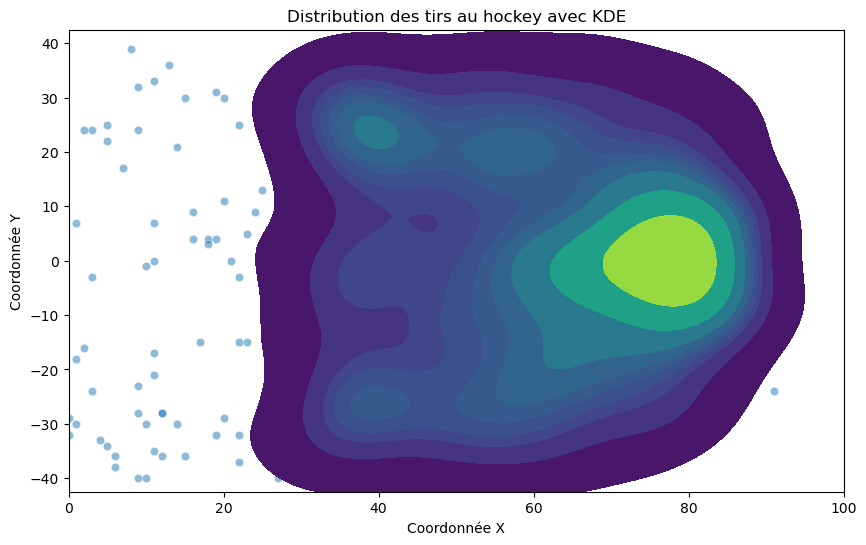

In [123]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dt_f[(dt_f['team'] == 'Boston Bruins') & (dt_f['gameId']//1000000 == 2020)], x='new_x', y='new_y', alpha=0.5)

# Appliquez l'estimation de densité de noyau (KDE) avec un noyau gaussien
sns.kdeplot(data=dt_f[(dt_f['team'] == 'Boston Bruins') & (dt_f['gameId']//1000000 == 2020)], x='new_x', y='new_y', cmap='viridis', fill=True)

# Ajoutez des informations supplémentaires, par exemple, le terrain de hockey en arrière-plan, les axes, etc.

# Réglez les limites des axes pour correspondre à la taille du terrain de hockey
plt.xlim(0, 100)
plt.ylim(-42.5, 42.5)

# Ajoutez un titre et des étiquettes d'axe
plt.title('Distribution des tirs au hockey avec KDE')
plt.xlabel('Coordonnée X')
plt.ylabel('Coordonnée Y')

# Affichez le graphique
plt.show()

TypeError: Axes.scatter() got multiple values for argument 'x'

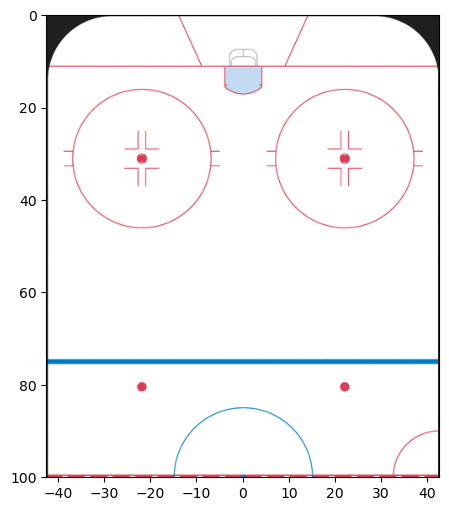

In [134]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt


# Charger l'image de fond
im = plt.imread('Capture d’écran 2023-10-14 131058.png')

# Créer une figure Matplotlib
fig, ax = plt.subplots(figsize=(6, 6))

# Ajuster la taille de la figure pour correspondre aux dimensions de la patinoire
height_rink, width_rink = 100, 42.5  # Dimensions de la patinoire NHL
ax.imshow(im, extent=[-width_rink, width_rink, height_rink,0 ])
# Créer un graphique de dispersion avec des clusters colorés à l'aide de Plotly
fig_plotly = ax.scatter(dt_f[(dt_f['team'] == 'Montréal Canadiens') & (dt_f['gameId']//1000000 == 2020)], x='new_x', y='new_y', 
                 title='Clusters des tirs au hockey',
                 labels={'x': 'Coordonnée X', 'y': 'Coordonnée Y'})


# Exporter le graphique Plotly en HTML
fig_plotly.write_html("graphique.html")

# Afficher l'image de fond (Matplotlib) et le graphique Plotly superposé
plt.show()

In [83]:
import plotly.graph_objects as go

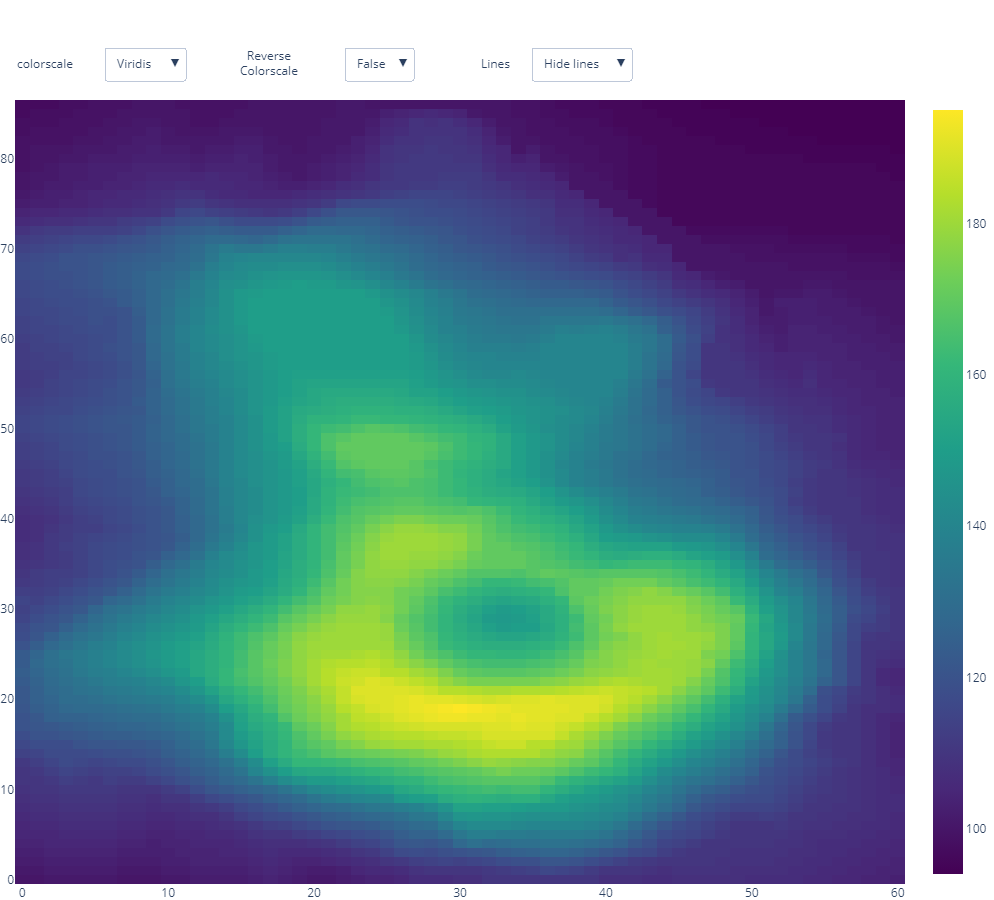

In [84]:

# load dataset
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/volcano.csv")

# Create figure
fig = go.Figure()

# Add surface trace
fig.add_trace(go.Heatmap(z=df.values.tolist(), colorscale="Viridis"))

# Update plot sizing
fig.update_layout(
    width=800,
    height=900,
    autosize=False,
    margin=dict(t=100, b=0, l=0, r=0),
)

# Update 3D scene options
fig.update_scenes(
    aspectratio=dict(x=1, y=1, z=0.7),
    aspectmode="manual"
)

# Add dropdowns
button_layer_1_height = 1.08
fig.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["colorscale", "Viridis"],
                    label="Viridis",
                    method="restyle"
                ),
                dict(
                    args=["colorscale", "Cividis"],
                    label="Cividis",
                    method="restyle"
                ),
                dict(
                    args=["colorscale", "Blues"],
                    label="Blues",
                    method="restyle"
                ),
                dict(
                    args=["colorscale", "Greens"],
                    label="Greens",
                    method="restyle"
                ),
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.1,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"
        ),
        dict(
            buttons=list([
                dict(
                    args=["reversescale", False],
                    label="False",
                    method="restyle"
                ),
                dict(
                    args=["reversescale", True],
                    label="True",
                    method="restyle"
                )
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.37,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"
        ),
        dict(
            buttons=list([
                dict(
                    args=[{"contours.showlines": False, "type": "contour"}],
                    label="Hide lines",
                    method="restyle"
                ),
                dict(
                    args=[{"contours.showlines": True, "type": "contour"}],
                    label="Show lines",
                    method="restyle"
                ),
            ]),
            direction="down",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0.58,
            xanchor="left",
            y=button_layer_1_height,
            yanchor="top"
        ),
    ]
)
fig.update_layout(
    images=[dict(
        source="Capture d’écran 2023-10-14 131058.png",
        xref="paper",  # Référence à l'axe x du papier
        yref="paper",  # Référence à l'axe y du papier
        x=0,  # Position x de l'image (0 = à gauche)
        y=1,  # Position y de l'image (1 = en haut)
        sizex=1,  # Largeur de l'image (1 = 100% de la largeur du graphique)
        sizey=1,  # Hauteur de l'image (1 = 100% de la hauteur du graphique)
        opacity=0.5  # Opacité de l'image (réglable selon vos besoins)
    )]
)
fig.update_layout(
    annotations=[
        dict(text="colorscale", x=0, xref="paper", y=1.06, yref="paper",
                             align="left", showarrow=False),
        dict(text="Reverse<br>Colorscale", x=0.25, xref="paper", y=1.07,
                             yref="paper", showarrow=False),
        dict(text="Lines", x=0.54, xref="paper", y=1.06, yref="paper",
                             showarrow=False)
    ])

fig.show()